<a href="https://colab.research.google.com/github/aaronkr-classroom/0-ml-team-project-pm-conan/blob/main/%EC%8A%A4%ED%8C%80%EB%A6%AC%EB%B7%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install kaggle

In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leegihyeon","key":"62e743165a87c5b1d26aaed42992178c"}'}

In [16]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [17]:
!kaggle datasets download -d filipkin/steam-reviews

Dataset URL: https://www.kaggle.com/datasets/filipkin/steam-reviews
License(s): MIT
 72% 10.0M/13.9M [00:00<00:00, 45.9MB/s]
100% 13.9M/13.9M [00:00<00:00, 47.7MB/s]


In [18]:
!unzip steam-reviews.zip

Archive:  steam-reviews.zip
  inflating: output.csv              


In [24]:

!ls  # 현재 디렉토리에 어떤 파일이 있는지 확인합니다.




kaggle.json  output.csv  sample_data  steam-reviews.zip


In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!ls /root/.kaggle


kaggle.json


In [3]:
!kaggle competition download -c severstal-steel-defect-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [28]:
data = pd.read_csv('output.csv')  # 적절한 CSV 파일을 읽어옵니다.
data.head()  # 데이터의 첫 몇 줄을 확인합니다.


,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [29]:
import pandas as pd

# CSV 파일 경로 (다운로드한 경로를 사용)
df = pd.read_csv('output.csv')

# 데이터셋의 첫 5개 행 확인
print(df.head())

# 데이터셋의 기본 정보 확인
print(df.info())

# 결측치 확인
print(df.isnull().sum())



          id  app_id                                            content  \
0  181331361     100               At least its a counter strike -1/100   
1  180872601     100  Uh... So far my playthrough has not been great...   
2  177836246     100                          Better mechanics than cs2   
3  177287444     100              buggy mess and NOT fun to play at all   
4  176678990     100  Whoever came up with this, is gonna fucking ge...   

           author_id is_positive  
0  76561199556485100    Negative  
1  76561199230620391    Negative  
2  76561198417690647    Negative  
3  76561199077268730    Negative  
4  76561199104544266    Negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    2

In [30]:
df = df.dropna(subset=['content'])
df['content'] = df['content'].fillna("No review provided")
import re

def preprocess_text(text):
    text = text.lower()  # 소문자화
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    return text

df['cleaned_content'] = df['content'].apply(preprocess_text)
df['label'] = df['is_positive'].apply(lambda x: 1 if x == 'Positive' else 0)
print(df.head())
print(df.info())


          id  app_id                                            content  \
0  181331361     100               At least its a counter strike -1/100   
1  180872601     100  Uh... So far my playthrough has not been great...   
2  177836246     100                          Better mechanics than cs2   
3  177287444     100              buggy mess and NOT fun to play at all   
4  176678990     100  Whoever came up with this, is gonna fucking ge...   

           author_id is_positive  \
0  76561199556485100    Negative   
1  76561199230620391    Negative   
2  76561198417690647    Negative   
3  76561199077268730    Negative   
4  76561199104544266    Negative   

                                     cleaned_content  label  
0                     at least its a counter strike       0  
1  uh so far my playthrough has not been great gl...      0  
2                           better mechanics than cs      0  
3              buggy mess and not fun to play at all      0  
4  whoever came up wit

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import re

# 1. 데이터 불러오기
data = pd.read_csv('output.csv')  # output.csv 파일 경로로 수정

# 2. 결측치 처리
# 결측치가 있는 열의 결측치 개수 확인
print("결측치 개수:")
print(data.isnull().sum())

# 결측치가 있는 행 삭제 (content 열에 결측치가 있을 경우)
data = data.dropna(subset=['content'])

# 3. 중복 데이터 처리
# 중복된 행 제거
data = data.drop_duplicates()

# 4. 데이터 타입 변환
# 데이터 타입 확인
print("데이터 타입 확인:")
print(data.dtypes)

# 5. 범주형 데이터 처리 (라벨 인코딩 또는 원-핫 인코딩)
# Label Encoding
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['is_positive'])

# 6. 텍스트 전처리 (cleaned_content 열 생성)
def preprocess_text(text):
    text = text.lower()  # 소문자화
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    return text

# 'content' 열을 처리하여 'cleaned_content' 열에 저장
data['cleaned_content'] = data['content'].apply(preprocess_text)

# 7. 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
# 예시: 'app_id' 열을 정규화
data['scaled_app_id'] = scaler.fit_transform(data[['app_id']])

# 8. 표준화 (Standardization)
scaler = StandardScaler()
# 예시: 'app_id' 열을 표준화
data['standardized_app_id'] = scaler.fit_transform(data[['app_id']])

# 9. 이상치 처리 (IQR 방법)
Q1 = data['app_id'].quantile(0.25)
Q3 = data['app_id'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 NaN으로 처리
data['app_id'] = data['app_id'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

# 10. 이상치 처리 (Z-Score 방법)
# Z-score 계산시, NaN 값을 제외하고 계산
z_scores = stats.zscore(data['app_id'].fillna(0))  # NaN을 0으로 처리하여 Z-score 계산
# Z-score가 3보다 큰 이상치를 제외
data = data[(z_scores < 3) & (z_scores > -3)]

# 11. 피처 엔지니어링 (예: 두 열을 더해서 새로운 피처 생성)
# 예시: 'app_id'와 'author_id'를 더하여 새로운 특성 생성
data['new_feature'] = data['app_id'] + data['author_id']

# 12. 피처 선택 (불필요한 열 삭제)
# 불필요한 열을 삭제 (예시로 'id' 열을 삭제)
data = data.drop(columns=['id'])

# 13. 데이터셋 분할 (훈련 세트와 테스트 세트)
X = data.drop(columns=['label'])  # 특성
y = data['label']  # 타겟

# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 14. 결과 출력
print("전처리 후 데이터:")
print(data.head())

# 전처리된 데이터를 새로운 CSV 파일로 저장
data.to_csv('/content/processed_output.csv', index=False)


결측치 개수:
id               0
app_id           0
content        428
author_id        0
is_positive      0
dtype: int64
데이터 타입 확인:
id              int64
app_id          int64
content        object
author_id       int64
is_positive    object
dtype: object
전처리 후 데이터:
   app_id                                            content  \
0   100.0               At least its a counter strike -1/100   
1   100.0  Uh... So far my playthrough has not been great...   
2   100.0                          Better mechanics than cs2   
3   100.0              buggy mess and NOT fun to play at all   
4   100.0  Whoever came up with this, is gonna fucking ge...   

           author_id is_positive  label  \
0  76561199556485100    Negative      0   
1  76561199230620391    Negative      0   
2  76561198417690647    Negative      0   
3  76561199077268730    Negative      0   
4  76561199104544266    Negative      0   

                                     cleaned_content  scaled_app_id  \
0                     a

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
import time

# 데이터 전처리 함수
def preprocess_text(text):
    # NaN 값을 처리하기 위해, NaN 값은 빈 문자열로 대체
    if pd.isna(text):  # NaN 값 확인
        return ""

    # 텍스트가 숫자인 경우도 빈 문자열로 처리
    if isinstance(text, float):  # 숫자 값 확인
        return ""

    # 소문자화 및 불필요한 문자 제거
    text = text.lower()  # 소문자화
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # 알파벳과 숫자만 남기기
    return text

def preprocess_batch(batch):
    # 텍스트 전처리
    batch['cleaned_content'] = batch['content'].apply(preprocess_text)

    # 라벨 인코딩 (이 예시에서는 'is_positive' 열을 라벨 인코딩)
    encoder = LabelEncoder()
    batch['label'] = encoder.fit_transform(batch['is_positive'])

    # 배치 후 결과 반환
    return batch

# 배치 처리 함수
def process_in_batches(file_path, chunksize=10000):
    # 청크 단위로 데이터 읽기
    chunks = pd.read_csv(file_path, chunksize=chunksize)

    # 중간 결과를 저장할 리스트
    processed_data = []

    for idx, chunk in enumerate(chunks):
        print(f"Processing batch {idx+1}")

        # 배치 전처리
        processed_chunk = preprocess_batch(chunk)

        # 전처리된 배치를 리스트에 추가
        processed_data.append(processed_chunk)

        # 중간 결과 저장 (배치마다 파일에 저장)
        processed_chunk.to_csv('/content/intermediate_output.csv', mode='a', header=(idx == 0), index=False)

        # 주기적으로 세션 유지 (약 10분마다 출력)
        if (idx + 1) % 10 == 0:
            print(f"Batch {idx+1} processed. Sleeping for 1 minute to keep session alive.")
            time.sleep(60)  # 1분마다 실행을 유지

    # 전체 데이터를 결합하여 반환
    final_data = pd.concat(processed_data, ignore_index=True)
    return final_data

# 파일 경로 설정
file_path = 'output.csv'  # 실제 파일 경로로 수정

# 배치 처리 시작
final_data = process_in_batches(file_path)

# 최종 전처리된 데이터 확인
print(final_data.head())

# 최종 전처리된 데이터 저장
final_data.to_csv('/content/final_output.csv', index=False)


Processing batch 1
Processing batch 2
Processing batch 3
Processing batch 4
Processing batch 5
Processing batch 6
Processing batch 7
Processing batch 8
Processing batch 9
Processing batch 10
Batch 10 processed. Sleeping for 1 minute to keep session alive.
Processing batch 11
Processing batch 12
Processing batch 13
Processing batch 14
Processing batch 15
Processing batch 16
Processing batch 17
Processing batch 18
Processing batch 19
Processing batch 20
Batch 20 processed. Sleeping for 1 minute to keep session alive.
Processing batch 21
          id  app_id                                            content  \
0  181331361     100               At least its a counter strike -1/100   
1  180872601     100  Uh... So far my playthrough has not been great...   
2  177836246     100                          Better mechanics than cs2   
3  177287444     100              buggy mess and NOT fun to play at all   
4  176678990     100  Whoever came up with this, is gonna fucking ge...   

        

### 데이터셋 기본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB
None


### 데이터셋 첫 5개 행 ###
          id  app_id                                            content  \
0  181331361     100               At least its a counter strike -1/100   
1  180872601     100  Uh... So far my playthrough has not been great...   
2  177836246     100                          Better mechanics than cs2   
3  177287444     100              buggy mess and NOT fun to play at all   
4  176678990     100  Whoever came up with this, is gonna fucking ge...   

           author_id is_positive  
0  76561199556

<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 47215 (\

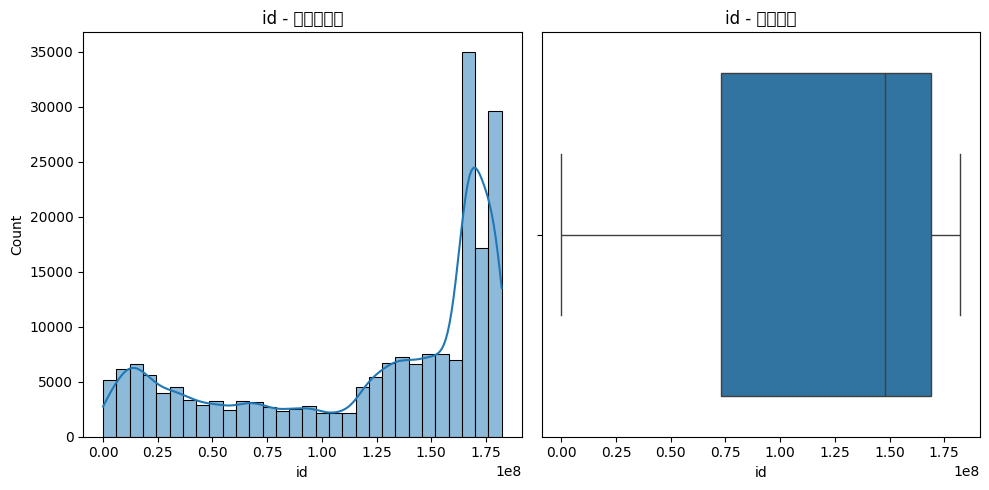

<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 47215 (\

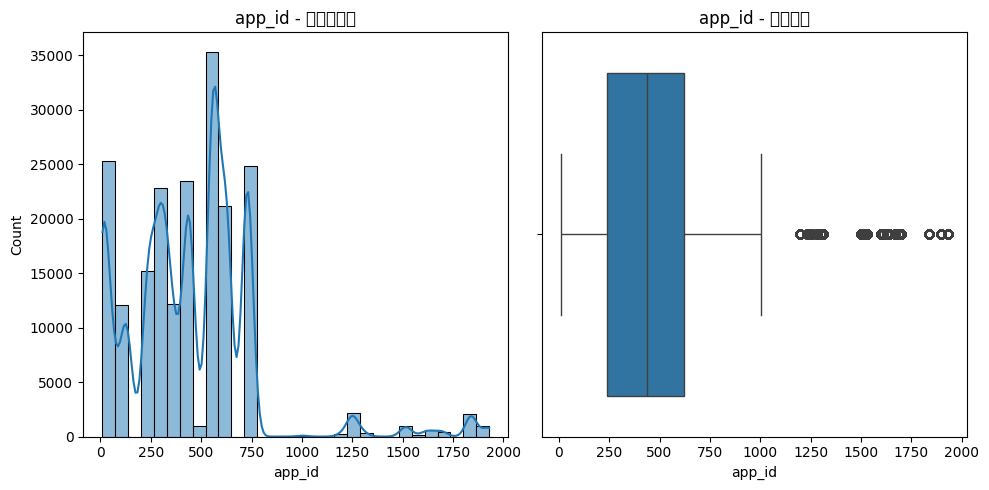

<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-3-c64b7c97a4bc>:52: UserWarning: Glyph 47215 (\

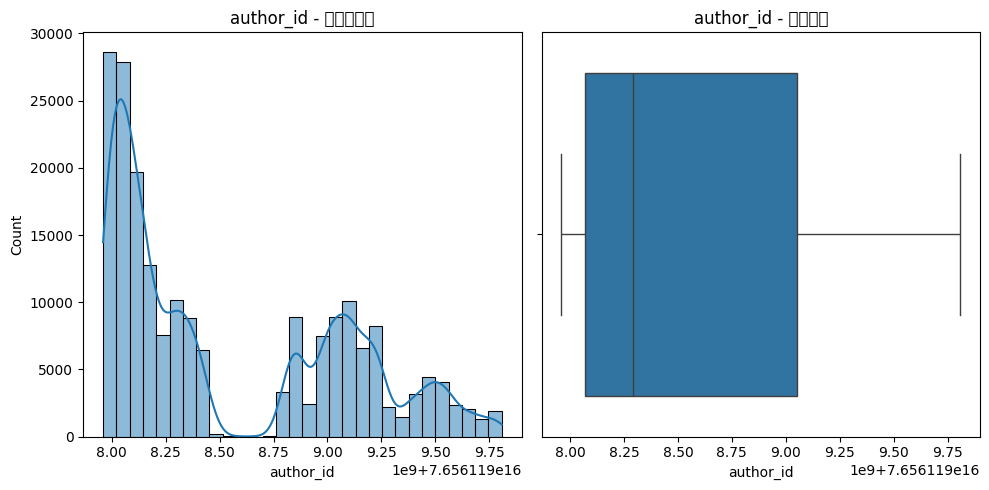

### 범주형 변수 분포 시각화 ###


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120297 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL V}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120302 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120313 (\N{MATHEMATICAL SANS-SERI

ValueError: 
I dont recomend this at all (only if you play on the computer for like 10 - 15 minutes per a day) well if you do play for it for 10 - 15 well play this game it will be fun but after a long time of playing it will get boring and also this is'nt like $40 only if you had pre ordered the orginal half life 2 and costed like 40 to 30 $$$ (if you that person i will give it a 6/10).And now the bit what im at i play on the computer for liek 5 houres and one day i get hl2 and i played this game and it was fun i used to speedrun the game but know its just boring nothing new you can get %100 in 1 houre and your finshed (but this one more thing speedruning like i said) but know to day i will give it 1/10 its rubish dont buy it unless you play pc for 10 to 15 minuted
                                                                                                                                                                                                                                                                                                                                           ^
ParseException: Expected end of text, found '$'  (at char 331), (line:1, col:332)

<Figure size 800x500 with 1 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


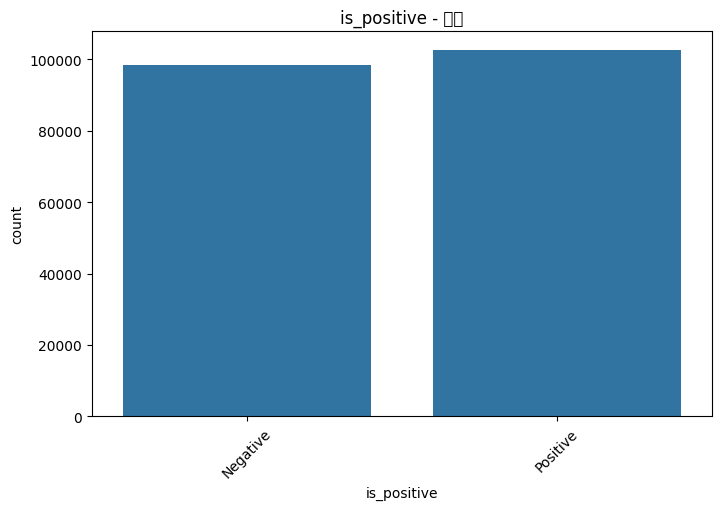

### 상관 관계 분석 ###


ValueError: could not convert string to float: 'At least its a counter strike -1/100'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('output.csv')  # 실제 데이터 파일 경로로 수정

# 1. 데이터셋의 기본 정보 확인
print("### 데이터셋 기본 정보 ###")
print(data.info())  # 데이터 타입과 결측치 확인
print("\n")

# 2. 데이터셋의 첫 5개 행 출력
print("### 데이터셋 첫 5개 행 ###")
print(data.head())  # 데이터의 첫 5개 행
print("\n")

# 3. 기술 통계량 (수치형 변수에 대한 기본 통계)
print("### 기술 통계량 ###")
print(data.describe())  # 수치형 변수의 평균, 표준편차 등
print("\n")

# 4. 결측치 확인
print("### 결측치 확인 ###")
print(data.isnull().sum())  # 각 컬럼의 결측치 개수
print("\n")

# 5. 고유 값 확인 (범주형 변수)
print("### 고유 값 확인 ###")
for column in data.select_dtypes(include=['object']).columns:
    print(f"Column: {column}, 고유 값 개수: {data[column].nunique()}")  # 범주형 변수의 고유 값 수
    print(data[column].value_counts())  # 범주형 변수의 값 분포
    print("\n")

# 6. 분포 시각화 (수치형 변수에 대해 히스토그램과 박스플롯)
print("### 수치형 변수 분포 시각화 ###")
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col} - 히스토그램')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} - 박스플롯')

    plt.tight_layout()
    plt.show()

# 7. 범주형 변수의 분포 시각화 (bar plot)
print("### 범주형 변수 분포 시각화 ###")
for column in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=data[column])
    plt.title(f'{column} - 분포')
    plt.xticks(rotation=45)
    plt.show()

# 8. 상관 관계 분석 (수치형 변수 간의 상관 관계 시각화)
print("### 상관 관계 분석 ###")
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("상관 관계 히트맵")
plt.show()

# 9. 타겟 변수의 분포 확인 (이 예시에서는 'is_positive' 컬럼을 타겟 변수로 가정)
print("### 타겟 변수 분포 확인 ###")
print(data['is_positive'].value_counts())  # 타겟 변수의 분포 확인

# 10. 데이터의 고유 값 확인 및 데이터 타입 검토
print("### 데이터 타입 및 고유 값 확인 ###")
print(data.dtypes)  # 각 컬럼의 데이터 타입 확인


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)  # 특성 수 5000개로 제한
X = vectorizer.fit_transform(data['cleaned_content'])

# 결과 확인
print(X.shape)  # 벡터화된 데이터의 형태


KeyError: 'cleaned_content'

### 데이터셋 기본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB
None


### 데이터셋 첫 5개 행 ###
          id  app_id                                            content  \
0  181331361     100               At least its a counter strike -1/100   
1  180872601     100  Uh... So far my playthrough has not been great...   
2  177836246     100                          Better mechanics than cs2   
3  177287444     100              buggy mess and NOT fun to play at all   
4  176678990     100  Whoever came up with this, is gonna fucking ge...   

           author_id is_positive  
0  76561199556

<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 47215 (\

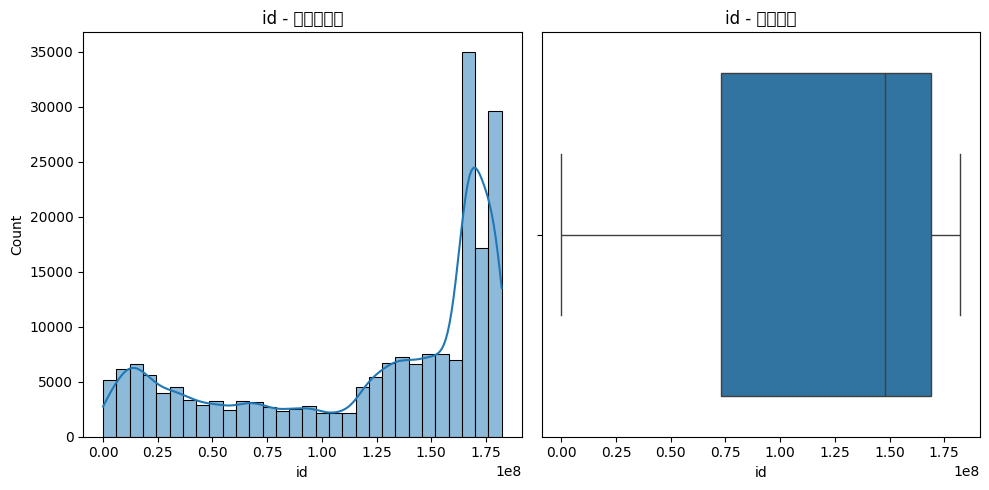

<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 47215 (\

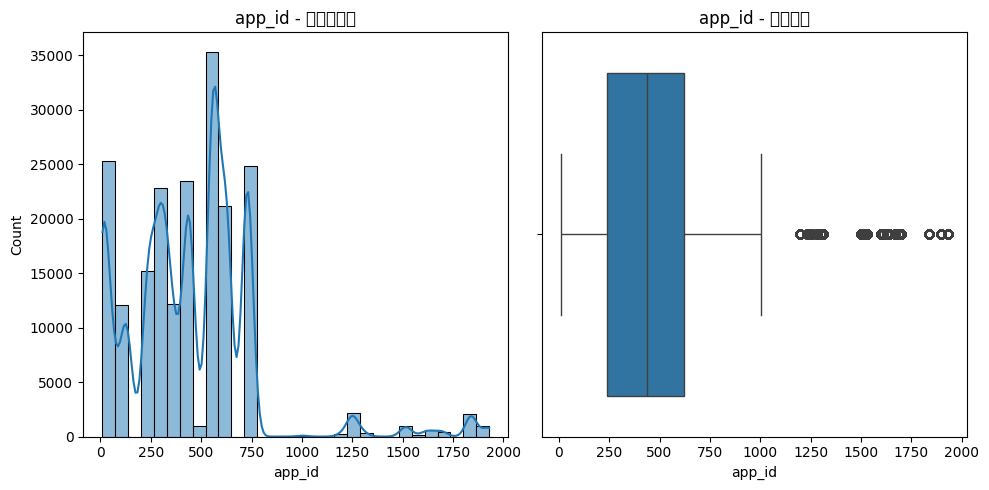

<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-1-aa771e2f344d>:51: UserWarning: Glyph 47215 (\

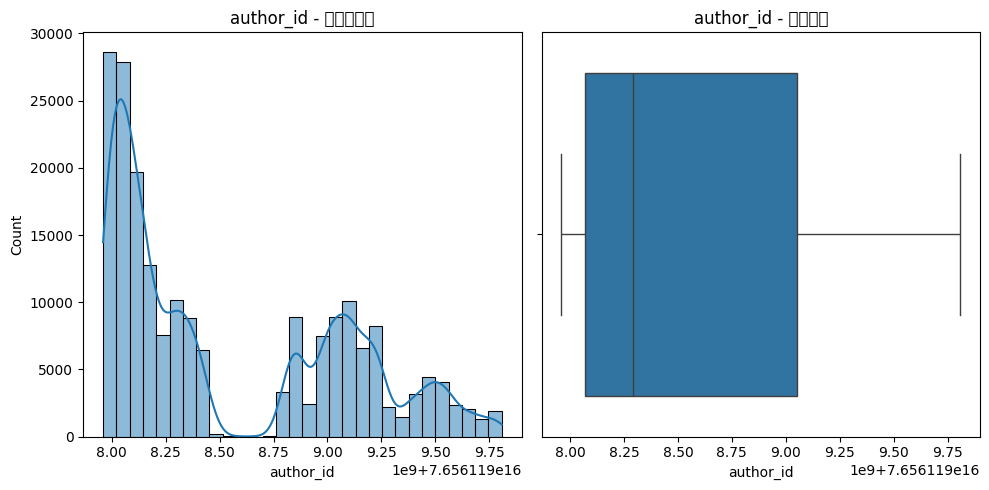

### 범주형 변수 분포 시각화 ###


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120297 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL V}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120302 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120313 (\N{MATHEMATICAL SANS-SERI

ValueError: 
I dont recomend this at all (only if you play on the computer for like 10 - 15 minutes per a day) well if you do play for it for 10 - 15 well play this game it will be fun but after a long time of playing it will get boring and also this is'nt like $40 only if you had pre ordered the orginal half life 2 and costed like 40 to 30 $$$ (if you that person i will give it a 6/10).And now the bit what im at i play on the computer for liek 5 houres and one day i get hl2 and i played this game and it was fun i used to speedrun the game but know its just boring nothing new you can get %100 in 1 houre and your finshed (but this one more thing speedruning like i said) but know to day i will give it 1/10 its rubish dont buy it unless you play pc for 10 to 15 minuted
                                                                                                                                                                                                                                                                                                                                           ^
ParseException: Expected end of text, found '$'  (at char 331), (line:1, col:332)

<Figure size 800x500 with 1 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


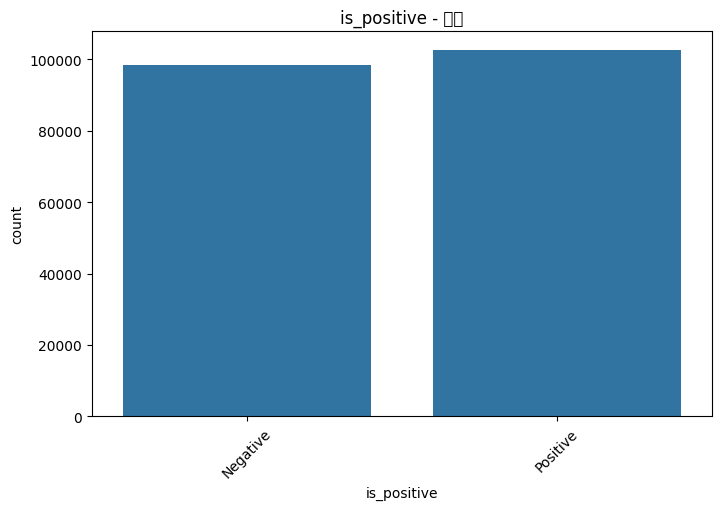

### 상관 관계 분석 ###


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

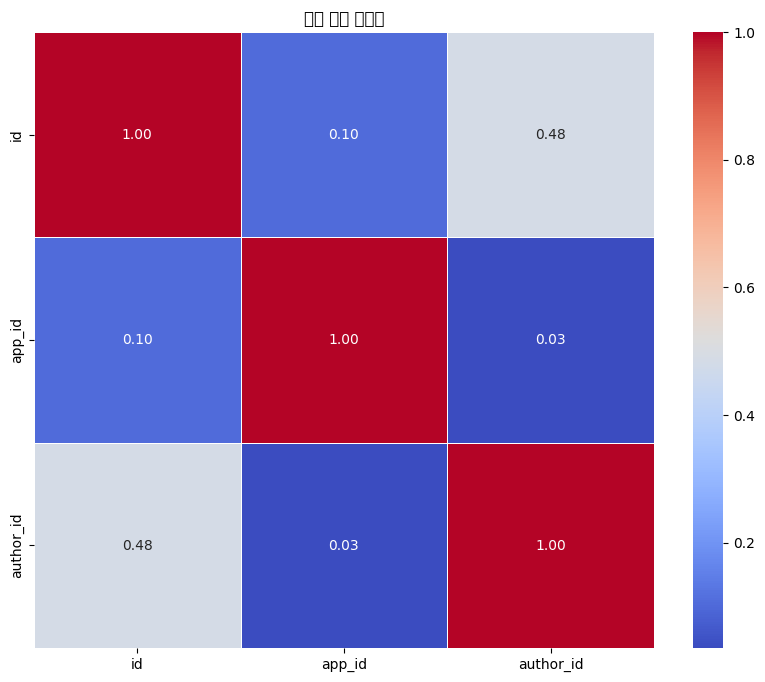

### 타겟 변수 분포 확인 ###
is_positive
Positive    102660
Negative     98491
Name: count, dtype: int64
### 데이터 타입 및 고유 값 확인 ###
id              int64
app_id          int64
content        object
author_id       int64
is_positive    object
dtype: object


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# 데이터 불러오기
data = pd.read_csv('output.csv')  # 실제 파일 경로로 수정

# 1. 데이터셋의 기본 정보 확인
print("### 데이터셋 기본 정보 ###")
print(data.info())  # 데이터 타입과 결측치 확인
print("\n")

# 2. 데이터셋의 첫 5개 행 출력
print("### 데이터셋 첫 5개 행 ###")
print(data.head())  # 데이터의 첫 5개 행
print("\n")

# 3. 기술 통계량 (수치형 변수에 대한 기본 통계)
print("### 기술 통계량 ###")
numeric_columns = data.select_dtypes(include=['number']).columns  # 수치형 변수만 선택
print(data[numeric_columns].describe())  # 수치형 변수의 평균, 표준편차 등
print("\n")

# 4. 결측치 확인
print("### 결측치 확인 ###")
print(data.isnull().sum())  # 각 컬럼의 결측치 개수
print("\n")

# 5. 고유 값 확인 (범주형 변수)
print("### 고유 값 확인 ###")
for column in data.select_dtypes(include=['object']).columns:
    print(f"Column: {column}, 고유 값 개수: {data[column].nunique()}")  # 범주형 변수의 고유 값 수
    print(data[column].value_counts())  # 범주형 변수의 값 분포
    print("\n")

# 6. 분포 시각화 (수치형 변수에 대해 히스토그램과 박스플롯)
print("### 수치형 변수 분포 시각화 ###")
for col in numeric_columns:
    plt.figure(figsize=(10, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col} - 히스토그램')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} - 박스플롯')

    plt.tight_layout()
    plt.show()

# 7. 범주형 변수의 분포 시각화 (bar plot)
print("### 범주형 변수 분포 시각화 ###")
for column in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=data[column])
    plt.title(f'{column} - 분포')
    plt.xticks(rotation=45)
    plt.show()

# 8. 상관 관계 분석 (수치형 변수 간의 상관 관계 시각화)
print("### 상관 관계 분석 ###")
correlation_matrix = data[numeric_columns].corr()  # 수치형 변수만 선택하여 상관 관계 계산
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("상관 관계 히트맵")
plt.show()

# 9. 타겟 변수의 분포 확인 (이 예시에서는 'is_positive' 컬럼을 타겟 변수로 가정)
print("### 타겟 변수 분포 확인 ###")
print(data['is_positive'].value_counts())  # 타겟 변수의 분포 확인

# 10. 데이터의 고유 값 확인 및 데이터 타입 검토
print("### 데이터 타입 및 고유 값 확인 ###")
print(data.dtypes)  # 각 컬럼의 데이터 타입 확인


In [4]:
# 'content' 열의 결측치를 빈 문자열로 대체
data['content'] = data['content'].fillna("")

# 전처리 함수 정의
import re

def clean_text(text):
    text = text.lower()  # 소문자화
    text = re.sub(r'[^a-z\s]', '', text)  # 특수문자 및 숫자 제거
    return text

# 'con


In [5]:
import re

# 간단한 텍스트 전처리 함수
def clean_text(text):
    # 소문자화
    text = text.lower()
    # 특수문자 및 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)
    # 불용어 제거 등 추가적인 전처리 작업을 여기에 추가할 수 있습니다.
    return text

# 'content' 열을 기반으로 'cleaned_content' 열 생성
data['cleaned_content'] = data['content'].apply(clean_text)

# 전처리된 데이터 확인
print(data[['content', 'cleaned_content']].head())


                                             content  \
0               At least its a counter strike -1/100   
1  Uh... So far my playthrough has not been great...   
2                          Better mechanics than cs2   
3              buggy mess and NOT fun to play at all   
4  Whoever came up with this, is gonna fucking ge...   

                                     cleaned_content  
0                     at least its a counter strike   
1  uh so far my playthrough has not been great gl...  
2                           better mechanics than cs  
3              buggy mess and not fun to play at all  
4  whoever came up with this is gonna fucking get...  


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 데이터 준비
X = data['cleaned_content']
y = data['is_positive'].map({'Positive': 1, 'Negative': 0})  # 레이블 인코딩

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_tfidf)
print("정확도:", accuracy_score(y_test, y_pred))
print("분류 보고서:")
print(classification_report(y_test, y_pred))


정확도: 0.8360219731053168
분류 보고서:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     19639
           1       0.81      0.88      0.85     20592

    accuracy                           0.84     40231
   macro avg       0.84      0.83      0.84     40231
weighted avg       0.84      0.84      0.84     40231



In [10]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
data = pd.read_csv('output.csv')  # 'output.csv' 경로에 맞게 파일 로드

# 2. 결측치 처리: 'content' 열의 결측치를 빈 문자열로 대체
data['content'] = data['content'].fillna("")

# 3. 텍스트 전처리 함수 정의
def clean_text(text):
    text = text.lower()  # 소문자화
    text = re.sub(r'[^a-z\s]', '', text)  # 알파벳과 공백만 남기고 특수문자, 숫자 제거
    return text

# 'content' 열을 기반으로 'cleaned_content' 열 생성
data['cleaned_content'] = data['content'].apply(clean_text)

# 4. 라벨 인코딩 (긍정/부정을 1/0으로 변환)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['is_positive'])

# 5. 훈련 데이터와 테스트 데이터 분할
X = data['cleaned_content']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)  # max_iter를 충분히 크게 설정
model.fit(X_train_tfidf, y_train)

# 8. 예측 및 성능 평가
y_pred = model.predict(X_test_tfidf)

# 정확도 출력
print("정확도:", accuracy_score(y_test, y_pred))

# 분류 보고서 출력
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 모델 저장 (선택 사항)
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')



정확도: 0.8360219731053168
분류 보고서:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     19639
           1       0.81      0.88      0.85     20592

    accuracy                           0.84     40231
   macro avg       0.84      0.83      0.84     40231
weighted avg       0.84      0.84      0.84     40231



['tfidf_vectorizer.pkl']

In [12]:
# NLTK stopwords를 대신하여 수동으로 불용어 리스트 정의
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
    "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
    "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because",
    "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out",
    "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where",
    "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
    "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn",
    "doesn", "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn",
    "wasn", "weren", "won", "wouldn"
]

def clean_text(text):
    # 소문자화
    text = text.lower()
    # 알파벳과 공백만 남기고 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)
    # 불용어 제거
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # 어간 추출
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text


In [13]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer

# 수동으로 불용어 리스트 정의
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
    "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
    "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because",
    "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out",
    "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where",
    "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
    "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn",
    "doesn", "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn",
    "wasn", "weren", "won", "wouldn"
]

# 텍스트 전처리 함수 정의
stemmer = PorterStemmer()

def clean_text(text):
    # 소문자화
    text = text.lower()
    # 알파벳과 공백만 남기고 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)
    # 불용어 제거
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # 어간 추출
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# 데이터 불러오기
data = pd.read_csv('output.csv')  # 'output.csv' 경로에 맞게 파일 로드

# 결측치 처리
data['content'] = data['content'].fillna("")

# 텍스트 전처리 적용
data['cleaned_content'] = data['content'].apply(clean_text)

# 라벨 인코딩
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['is_positive'])

# 특성 엔지니어링
data['text_length'] = data['cleaned_content'].apply(len)
data['word_count'] = data['cleaned_content'].apply(lambda x: len(x.split()))
data['char_count'] = data['cleaned_content'].apply(lambda x: sum(len(word) for word in x.split()))

# 훈련 데이터와 테스트 데이터 분할
X = data[['cleaned_content', 'text_length', 'word_count', 'char_count']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_content'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_content'])

# 모델 학습 및 평가
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
logreg_pred = logreg.predict(X_test_tfidf)

# 성능 평가
print("로지스틱 회귀 성능:")
print(classification_report(y_test, logreg_pred))


로지스틱 회귀 성능:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231



In [16]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import cross_val_score

# 1. 데이터 불러오기
data = pd.read_csv('output.csv')  # 'output.csv' 경로에 맞게 파일 로드

# 2. 결측치 처리
data['content'] = data['content'].fillna("")

# 3. 텍스트 전처리 함수 정의
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # 소문자화
    text = text.lower()
    # 알파벳과 공백만 남기고 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)
    # 불용어 제거
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # 어간 추출
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# 'content' 열을 기반으로 'cleaned_content' 열 생성
data['cleaned_content'] = data['content'].apply(clean_text)

# 4. 라벨 인코딩 (긍정/부정을 1/0으로 변환)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['is_positive'])

# 5. 특성 엔지니어링 (텍스트 길이, 단어 수, 문자 수 등 추가)
data['text_length'] = data['cleaned_content'].apply(len)
data['word_count'] = data['cleaned_content'].apply(lambda x: len(x.split()))
data['char_count'] = data['cleaned_content'].apply(lambda x: sum(len(word) for word in x.split()))

# 6. 훈련 데이터와 테스트 데이터 분할
X = data[['cleaned_content', 'text_length', 'word_count', 'char_count']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_content'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_content'])

# 8. 모델 튜닝 및 다양한 알고리즘 테스트
# 로지스틱 회귀 모델
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
logreg_pred = logreg.predict(X_test_tfidf)

# 서포트 벡터 머신 (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)

# 랜덤 포레스트 모델
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict(X_test_tfidf)

# 나이브 베이즈 모델
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

# 9. 성능 평가
print("로지스틱 회귀 성능:")
print(classification_report(y_test, logreg_pred))

print("SVM 성능:")
print(classification_report(y_test, svm_pred))

print("랜덤 포레스트 성능:")
print(classification_report(y_test, rf_pred))

print("나이브 베이즈 성능:")
print(classification_report(y_test, nb_pred))

# 10. 그리드 서치 (하이퍼파라미터 튜닝) 예시: 로지스틱 회귀
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
best_model = grid_search.best_estimator_

print("그리드 서치 최적 모델:", best_model)

# 11. 성능 평가 (최적화된 모델)
y_pred = best_model.predict(X_test_tfidf)
print("최적 모델 성능:")
print(classification_report(y_test, y_pred))


로지스틱 회귀 성능:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231

SVM 성능:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81     19639
           1       0.79      0.88      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231

랜덤 포레스트 성능:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.83     20592

    accuracy                           0.82     40231
   macro avg       0.82      0.82      0.82     40231
weighted avg       0.82      0.82      0.8

In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [500, 1000, 1500],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV 사용
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# 최적의 하이퍼파라미터 출력
print(f"최적 하이퍼파라미터: {grid_search.best_params_}")

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# 성능 평가
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 하이퍼파라미터: {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231



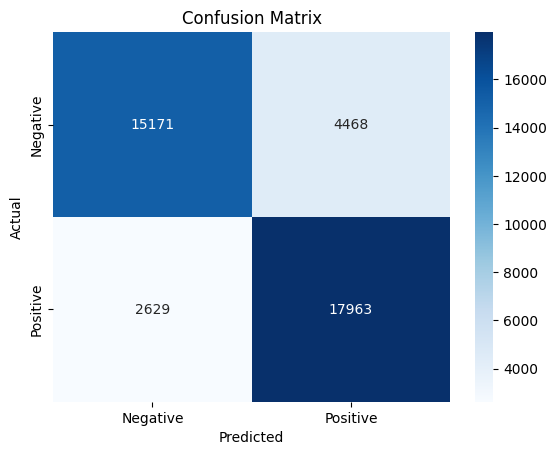

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
import joblib

# 모델 저장
joblib.dump(best_model, 'best_logistic_regression_model.pkl')

# 저장된 모델 로드
loaded_model = joblib.load('best_logistic_regression_model.pkl')
y_pred = loaded_model.predict(X_test_tfidf)

# 성능 평가
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [500, 1000, 1500],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV 설정 (교차 검증 5-fold 사용)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# 최적의 하이퍼파라미터 출력
print(f"최적 하이퍼파라미터: {grid_search.best_params_}")

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# 성능 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 하이퍼파라미터: {'C': 1, 'max_iter': 1500, 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231



In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 교차 검증을 통한 모델 평가 (교차 검증 5-fold)
logreg = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
cross_val_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5)

# 평균 성능 출력
print(f"교차 검증 평균 정확도: {cross_val_scores.mean()}")

# 교차 검증 성능 출력
print(f"교차 검증 각 fold의 정확도: {cross_val_scores}")


교차 검증 평균 정확도: 0.8235147899577429
교차 검증 각 fold의 정확도: [0.826653   0.82130872 0.82488193 0.82121551 0.82351479]


In [22]:
from sklearn.metrics import classification_report

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test_tfidf)

# 성능 평가
print(f"최종 모델 성능:")
print(classification_report(y_test, y_pred))


최종 모델 성능:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231



In [23]:
import joblib

# 모델 저장
joblib.dump(best_model, 'best_logistic_regression_model.pkl')

# 모델 로드 후 사용
loaded_model = joblib.load('best_logistic_regression_model.pkl')
y_pred = loaded_model.predict(X_test_tfidf)

# 성능 평가
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231



In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# 성능 지표 출력
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print(f"혼동 행렬:\n{cm}")


              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19639
           1       0.80      0.87      0.84     20592

    accuracy                           0.82     40231
   macro avg       0.83      0.82      0.82     40231
weighted avg       0.83      0.82      0.82     40231

혼동 행렬:
[[15170  4469]
 [ 2629 17963]]


In [25]:
import joblib
joblib.dump(best_model, 'final_model.pkl')


['final_model.pkl']

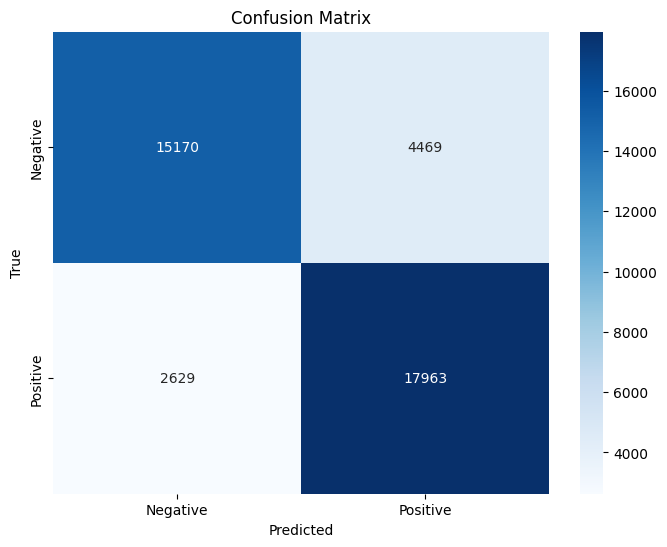

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 히트맵 형태로 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Accuracy: 0.8030871715841018
Confusion Matrix:
 [[14437  5202]
 [ 2720 17872]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78     19639
           1       0.77      0.87      0.82     20592

    accuracy                           0.80     40231
   macro avg       0.81      0.80      0.80     40231
weighted avg       0.81      0.80      0.80     40231



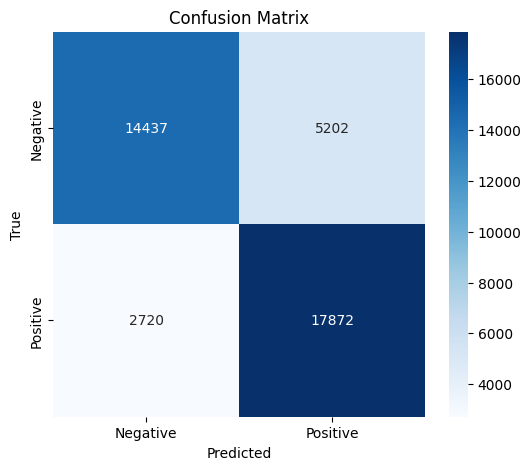

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('output.csv')

# 데이터 전처리 (결측치 및 중복 처리)
df['content'] = df['content'].fillna("No review provided")  # 결측치 처리
df = df.drop_duplicates()  # 중복 데이터 삭제

# 텍스트 데이터 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # 상위 1000개의 단어만 사용
X = vectorizer.fit_transform(df['content'])  # 텍스트를 벡터화한 데이터

# 타겟 변수
y = df['is_positive'].map({'Negative': 0, 'Positive': 1})  # 'Negative'는 0, 'Positive'는 1로 매핑

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


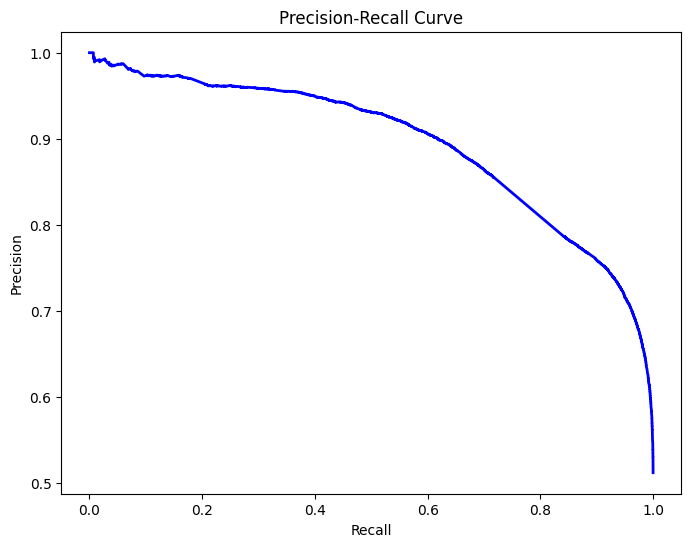

In [29]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


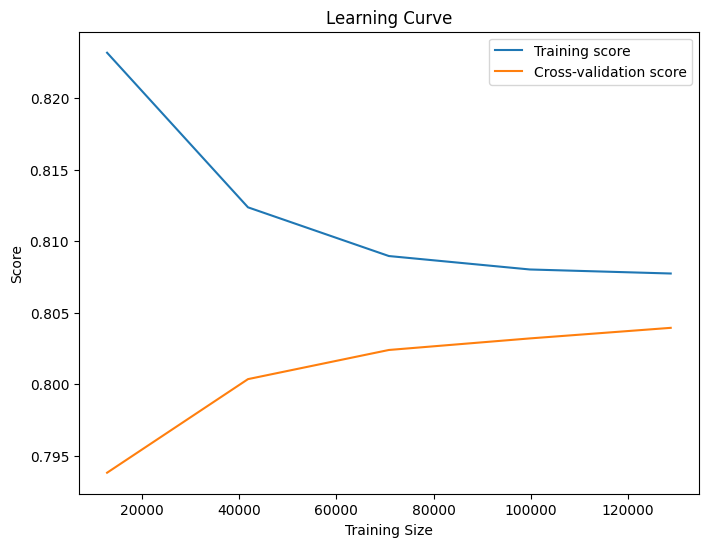

In [30]:
from sklearn.model_selection import learning_curve

# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)

# 학습 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


Accuracy: 0.8030871715841018
Confusion Matrix:
 [[14437  5202]
 [ 2720 17872]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78     19639
           1       0.77      0.87      0.82     20592

    accuracy                           0.80     40231
   macro avg       0.81      0.80      0.80     40231
weighted avg       0.81      0.80      0.80     40231



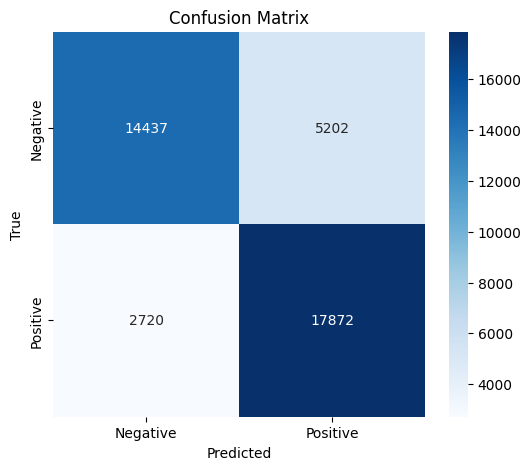

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('output.csv')

# 데이터 전처리 (결측치 및 중복 처리)
df['content'] = df['content'].fillna("No review provided")  # 결측치 처리
df = df.drop_duplicates()  # 중복 데이터 삭제

# 텍스트 데이터 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # 상위 1000개의 단어만 사용
X = vectorizer.fit_transform(df['content'])  # 텍스트를 벡터화한 데이터

# csr_matrix에서 DataFrame으로 변환
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 타겟 변수
y = df['is_positive'].map({'Negative': 0, 'Positive': 1})  # 'Negative'는 0, 'Positive'는 1로 매핑

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Accuracy: 0.8030871715841018
Confusion Matrix:
 [[14437  5202]
 [ 2720 17872]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78     19639
           1       0.77      0.87      0.82     20592

    accuracy                           0.80     40231
   macro avg       0.81      0.80      0.80     40231
weighted avg       0.81      0.80      0.80     40231



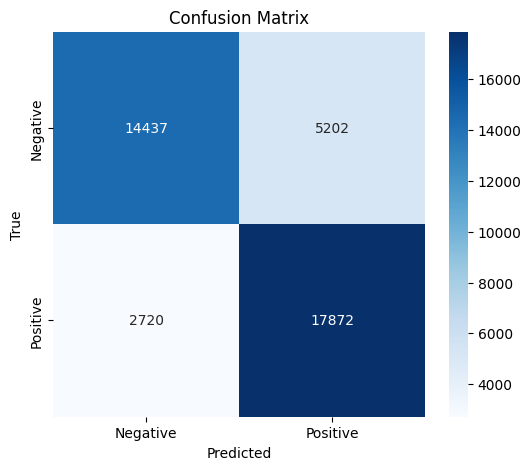

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('output.csv')

# 데이터 전처리 (결측치 및 중복 처리)
df['content'] = df['content'].fillna("No review provided")  # 결측치 처리
df = df.drop_duplicates()  # 중복 데이터 삭제

# 텍스트 데이터 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # 상위 1000개의 단어만 사용
X = vectorizer.fit_transform(df['content'])  # 텍스트를 벡터화한 데이터

# csr_matrix에서 DataFrame으로 변환
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 타겟 변수
y = df['is_positive'].map({'Negative': 0, 'Positive': 1})  # 'Negative'는 0, 'Positive'는 1로 매핑

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Accuracy: 0.8030871715841018
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78     19639
           1       0.77      0.87      0.82     20592

    accuracy                           0.80     40231
   macro avg       0.81      0.80      0.80     40231
weighted avg       0.81      0.80      0.80     40231



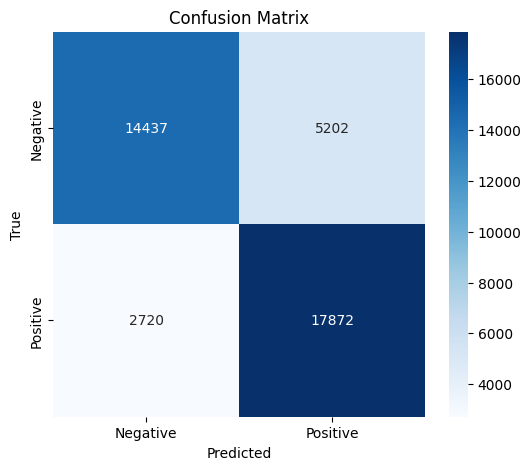

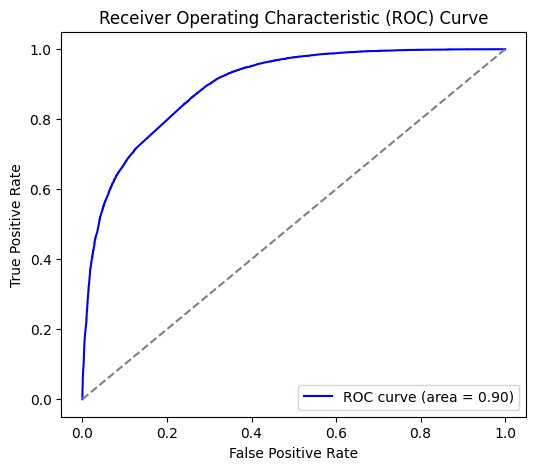

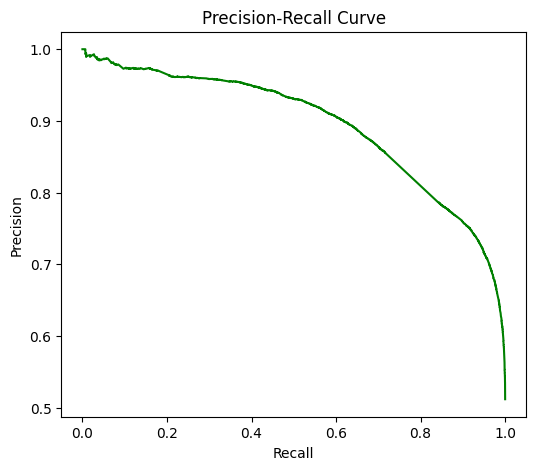

<ipython-input-35-16928237cb22>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importance, y=top_features, palette="viridis")


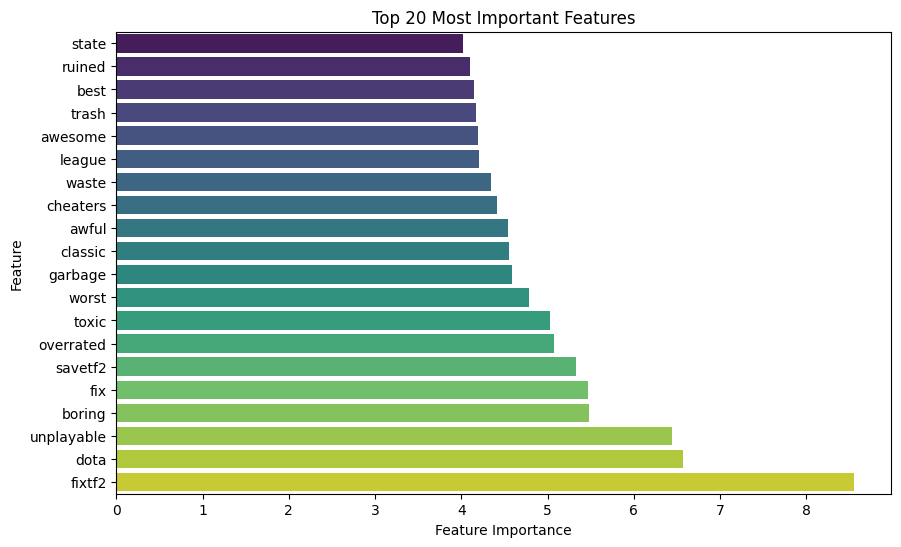

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 데이터 불러오기
df = pd.read_csv('output.csv')

# 데이터 전처리 (결측치 및 중복 처리)
df['content'] = df['content'].fillna("No review provided")  # 결측치 처리
df = df.drop_duplicates()  # 중복 데이터 삭제

# 텍스트 데이터 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # 상위 1000개의 단어만 사용
X = vectorizer.fit_transform(df['content'])  # 텍스트를 벡터화한 데이터

# csr_matrix에서 DataFrame으로 변환
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 타겟 변수
y = df['is_positive'].map({'Negative': 0, 'Positive': 1})  # 'Negative'는 0, 'Positive'는 1로 매핑

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Positive 클래스 확률

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 정확도 출력
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve 시각화
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance (상위 20개 중요한 단어 시각화)
feature_importance = np.abs(model.coef_[0])  # 각 특성의 중요도
top_n = 20  # 상위 20개 특성
top_features_idx = np.argsort(feature_importance)[-top_n:]
top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_idx]
top_feature_importance = feature_importance[top_features_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_features, palette="viridis")
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


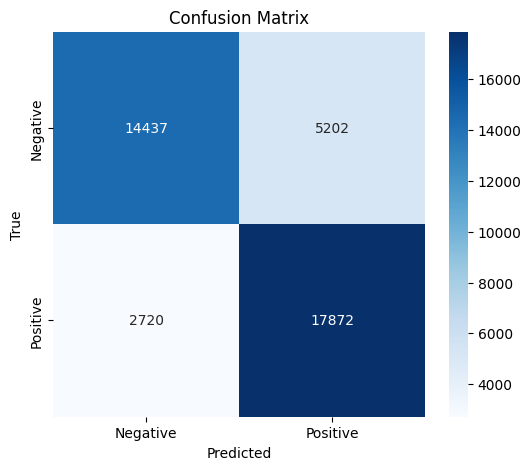

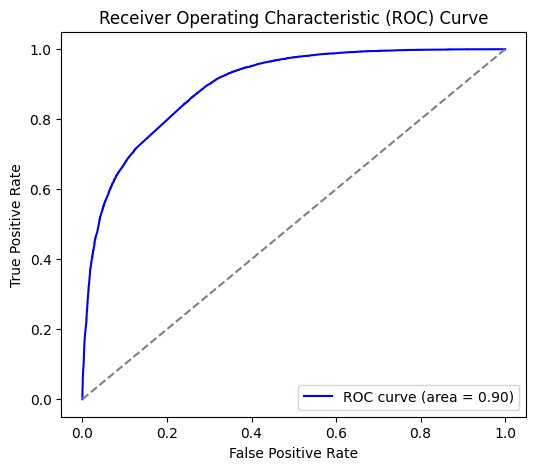

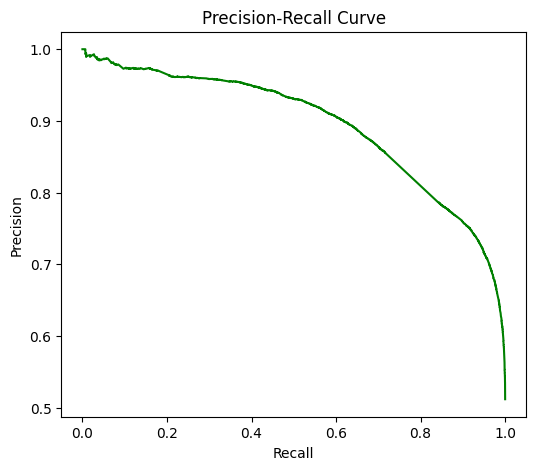

<ipython-input-36-af580a827965>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importance, y=top_features, palette="viridis")


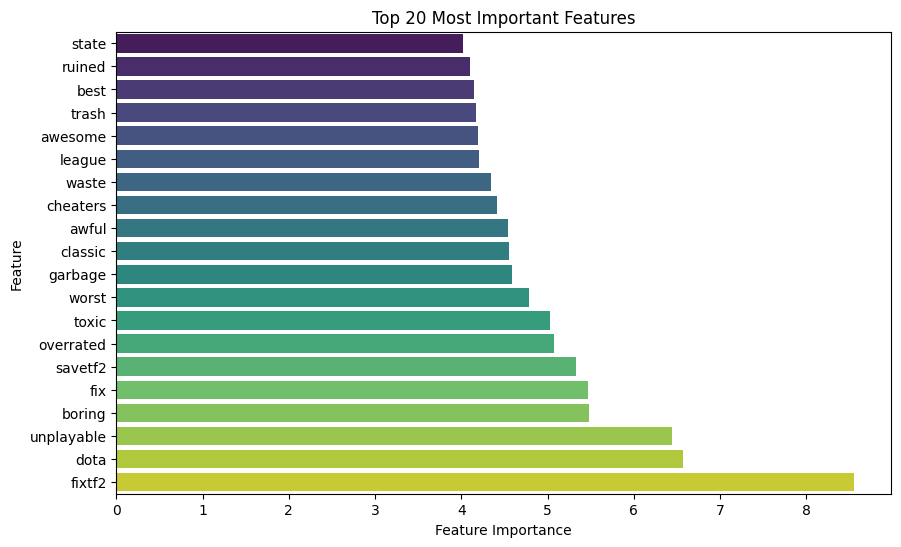

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np

def plot_confusion_matrix(y_true, y_pred):
    """
    Confusion Matrix 시각화
    """
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_roc_curve(y_true, y_prob):
    """
    ROC Curve 시각화
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(y_true, y_prob):
    """
    Precision-Recall Curve 시각화
    """
    precision, recall, _ = precision_recall_curve(y_true, y_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

def plot_feature_importance(model, vectorizer, top_n=20):
    """
    중요한 피처 시각화
    """
    feature_importance = np.abs(model.coef_[0])  # 각 특성의 중요도
    top_features_idx = np.argsort(feature_importance)[-top_n:]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_idx]
    top_feature_importance = feature_importance[top_features_idx]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_feature_importance, y=top_features, palette="viridis")
    plt.title(f'Top {top_n} Most Important Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# 예시로 사용할 모델과 데이터
# y_test와 y_pred는 로지스틱 회귀 모델의 실제 값과 예측 값입니다.
# y_prob는 예측된 확률 값입니다.

# 1. Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

# 2. ROC Curve
plot_roc_curve(y_test, y_prob)

# 3. Precision-Recall Curve
plot_precision_recall_curve(y_test, y_prob)

# 4. Feature Importance
plot_feature_importance(model, vectorizer, top_n=20)


# 새 섹션